In [11]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pickle import load
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import datetime
import sys
from pathlib import Path
import pandas as pd
import statsmodels.api as sm

sys.path.append("..")
sys.path.append("../../")

from process_outputs import parse_outputs

from eoles.write_output import get_total_system_costs, comparison_simulations_new, plot_typical_week, plot_typical_demand, plot_residual_demand, colormap_simulations
from project.write_output import plot_compare_scenarios

In [12]:
folder_name = 'simulations/marginal_20240222_184924'
scenarios_complete = parse_outputs(Path(folder_name))

In [22]:
data = pd.read_csv('simulations/scenarios_montecarlo_23022024.csv', index_col=0)

In [33]:
print(data_with_dummies)

          insulation_reference  learning_reference  elasticity_Elasticity-  \
S247                         0                   1                       1   
S62                          1                   1                       1   
S227                         0                   1                       1   
S59                          1                   1                       1   
S180                         1                   0                       0   
...                        ...                 ...                     ...   
S238-ban                     0                   1                       1   
S262-ban                     0                   1                       0   
S241-ban                     0                   1                       1   
S118-ban                     1                   0                       0   
S61-ban                      1                   1                       1   

          elasticity_reference  biogas_reference  capacity_ren_

In [34]:
# variables = ['insulation', 'learning', 'elasticity', 'biogas', 'capacity_ren', 'demand', 'gasprices', 'woodprices', 'ban', 'passed']
variables = ['learning', 'elasticity', 'biogas', 'capacity_ren', 'demand', 'gasprices', 'woodprices', 'passed']
data = data[variables]
for c in data.columns:
    data[c] = data[c].astype('category')

data_with_dummies = pd.get_dummies(data, drop_first=True)

# Define the independent variables (X) and the dependent variable (y)
X = data_with_dummies.drop('passed_1.0', axis=1)
y = data_with_dummies['passed_1.0']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model
print(model.summary())

Optimization terminated successfully.
         Current function value: 83.463949
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             passed_1.0   No. Observations:                  200
Model:                          Logit   Df Residuals:                      191
Method:                           MLE   Df Model:                            8
Date:                Fri, 23 Feb 2024   Pseudo R-squ.:                     inf
Time:                        10:35:00   Log-Likelihood:                -16693.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.4637      0.483      0.960      0.337      -0.483     

/Users/lucas/opt/anaconda3/envs/eoles/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lucas/opt/anaconda3/envs/eoles/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lucas/opt/anaconda3/envs/eoles/lib/python3.10/site-packages/statsmodels/discrete/discrete_model.py:4465: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


In [28]:
data_with_dummies.columns

Index(['insulation_reference', 'learning_reference', 'elasticity_Elasticity-',
       'elasticity_reference', 'biogas_reference', 'capacity_ren_reference',
       'demand_reference', 'gasprices_reference', 'woodprices_reference',
       'ban_reference', 'passed_1.0'],
      dtype='object')

In [25]:
data

insulation   learning   elasticity     biogas capacity_ren  \
S247       NoPolicy  reference  Elasticity-    Biogas-    reference   
S62       reference  reference  Elasticity-    Biogas-         Ren-   
S227       NoPolicy  reference  Elasticity-  reference    reference   
S59       reference  reference  Elasticity-    Biogas-         Ren-   
S180      reference  Learning+  Elasticity+    Biogas-    reference   
...             ...        ...          ...        ...          ...   
S238-ban   NoPolicy  reference  Elasticity-  reference         Ren-   
S262-ban   NoPolicy  reference  Elasticity+  reference    reference   
S241-ban   NoPolicy  reference  Elasticity-    Biogas-    reference   
S118-ban  reference  Learning+    reference    Biogas-    reference   
S61-ban   reference  reference  Elasticity-    Biogas-         Ren-   

               demand  gasprices  woodprices        ban passed  
S247      Sufficiency  PriceGas+  PriceWood+  reference    0.0  
S62       Sufficiency  PriceGas+   reference  reference    0.0  
S227        reference  PriceGas+  PriceWood+  reference    0.0  
S59         reference  PriceGas+  PriceWood+  reference    0.0  
S180      Sufficiency  reference   reference  reference    1.0  
...               ...        ...         ...        ...    ...  
S238-ban  Sufficiency  PriceGas+   reference        Ban    1.0  
S262-ban  Sufficiency  PriceGas+   reference        Ban    1.0  
S241-ban    reference  reference  PriceWood+        Ban    0.0  
S118-ban  Sufficiency  PriceGas+   reference        Ban    1.0  
S61-ban   Sufficiency  reference  PriceWood+        Ban    1.0  

[200 rows x 10 columns]

In [20]:
print(data.columns)

Index(['Unnamed: 0', 'insulation', 'learning', 'elasticity', 'biogas',
       'capacity_ren', 'demand', 'gasprices', 'woodprices', 'ban', 'passed',
       'Total costs', 'Investment electricity costs',
       'Investment heater costs', 'Investment insulation costs',
       'Functionment costs', 'Stock Heat pump (Million)',
       'Stock Direct electric (Million)', 'Stock Natural gas (Million)',
       'Stock Wood fuel (Million)', 'Consumption Electricity (TWh)',
       'Consumption Natural gas (TWh)', 'Consumption Wood fuel (TWh)',
       'offshore', 'onshore', 'pv', 'battery', 'hydro', 'peaking plants',
       'methanization', 'pyrogazification', 'Generation methanization (TWh)',
       'Generation pyrogazification (TWh)'],
      dtype='object')


In [15]:
# transform in categorical variables

# Define the independent variables (X) and the dependent variable (y)
X = data.drop('passed', axis=1)
y = data['passed']

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print the summary of the model
print(model.summary())

In [10]:
sns.boxplot(data=scenarios_complete, x='learning', y='Total costs', hue='biogas')
plt.show()

ValueError: Could not interpret input 'learning'

AttributeError: 'numpy.ndarray' object has no attribute 'add_patch'

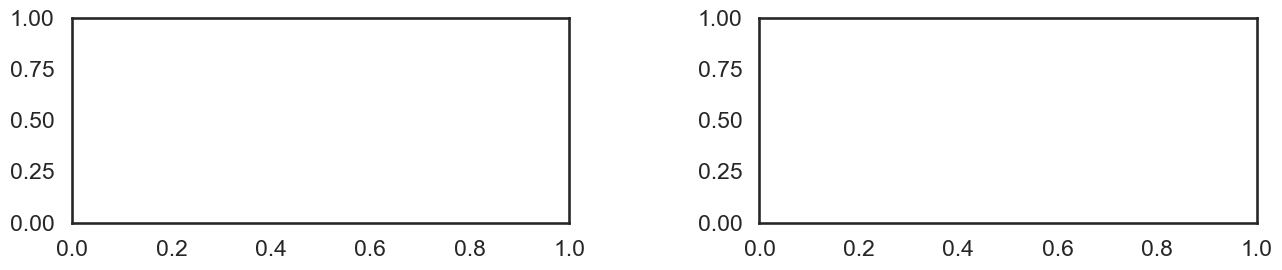

In [14]:
L = ['learning', 'elasticity']  # Add your variable names here

# Define the number of rows and columns for subplots based on the length of L
n = len(L)
ncols = 2  # Define number of columns per row
nrows = n // ncols + (n % ncols > 0)  # Calculate required number of rows

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(15, nrows * 5))
fig.tight_layout(pad=5.0)

# Flatten axes array if more than one row
if nrows > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Iterate over variables and create a boxplot for each
for i, variable in enumerate(L):
    sns.boxplot(data=scenarios_complete, x=variable, y='Total costs', hue='biogas', ax=axes[i])
    axes[i].set_title(f'Boxplot of Total costs by {variable} and biogas')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability

# Hide any unused subplots if L does not fill up the entire grid
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axes[j])

plt.show()

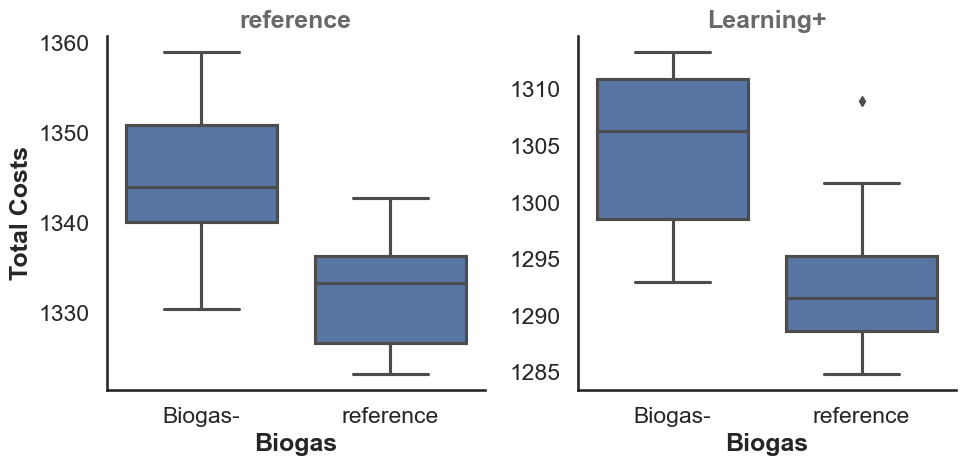

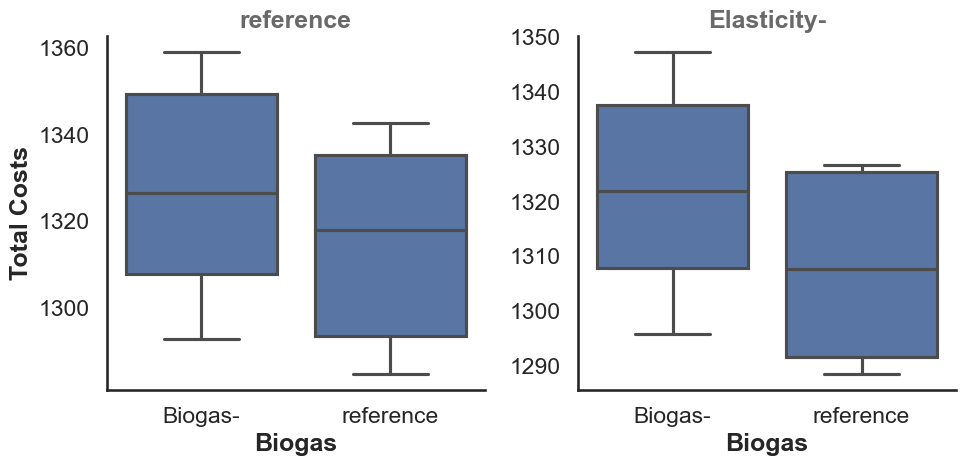

In [13]:
L = ['learning', 'elasticity']  # Add your variables here

for variable in L:
    # Create a FacetGrid for each variable. Since we are not faceting by row or column, we use hue.
    g = sns.FacetGrid(scenarios_complete, col=variable, col_wrap=2, sharex=False, sharey=False, height=5, aspect=1)
    
    # Map a boxplot to the FacetGrid
    g.map(sns.boxplot, 'biogas', 'Total costs', order=sorted(scenarios_complete['biogas'].unique()))
    
    # Adjust the axis labels and plot titles as needed
    g.set_axis_labels('Biogas', 'Total Costs')
    g.set_titles('{col_name}')

    # Adjust the layout so titles and labels don't overlap
    g.fig.tight_layout(w_pad=1)
    
    # Show the plot
plt.show()

# Comparison policy scenarios costs

AttributeError: 'NoneType' object has no attribute 'loc'

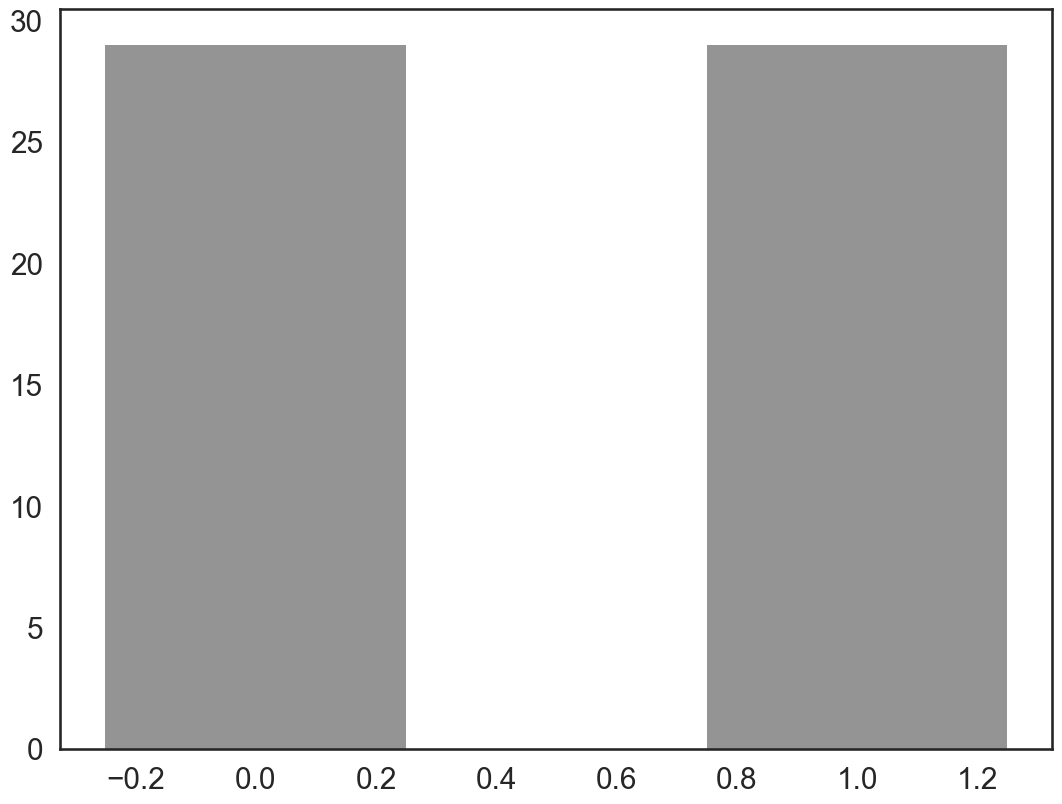

In [3]:
# 1110 : with price feedback, OLD health costs
sns.set_theme(context="talk", style="white", font_scale=1.3)
dict_output = {
     # '': {
     #    "Ambitious": os.path.join("eoles/outputs/20231210/1211010909_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyambitious"),
     #    "Ban": os.path.join("eoles/outputs/20231210/1211004148_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyban"),
     #    "Ban no policy": os.path.join("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy"),
     #     "Ban ref": os.path.join("eoles/outputs/20231210/1211010852_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybanref"),
     #   # "Carbon tax": os.path.join("eoles/outputs/20231210/1211012604_biogasS3_capacityN1_demandReindustrialisation_profileReference_policycarbontax"),
     #    # "Reference": os.path.join("eoles/outputs/20231210/1211010746_biogasS3_capacityN1_demandReindustrialisation_profileReference_policyreference"),
     # },
         '': {
        "Ambitious": os.path.join("eoles/outputs/20231210/1211004316_biogasS3_capacityN1_demandReference_profileReference_policyambitious"),
        "Ban": os.path.join("eoles/outputs/20231210/1210235222_biogasS3_capacityN1_demandReference_profileReference_policyban"),
        "Ban no policy": os.path.join("eoles/outputs/20231210/1210235104_biogasS3_capacityN1_demandReference_profileReference_policybannopolicy"),
         "Ban ref": os.path.join("eoles/outputs/20231210/1211001733_biogasS3_capacityN1_demandReference_profileReference_policybanref"),
        "Carbon tax": os.path.join("eoles/outputs/20231210/1211010310_biogasS3_capacityN1_demandReference_profileReference_policycarbontax"),
        "Reference": os.path.join("eoles/outputs/20231210/1211004541_biogasS3_capacityN1_demandReference_profileReference_policyreference"),
     },
}


results_resirf = {}
for scenario in dict_output.keys():
    for path, name_config in zip(dict_output[scenario].values(), [n for n in dict_output[scenario].keys()]):
        with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
            name_config_tot = scenario + ' ' + name_config
            output = load(file)
            results_resirf[name_config_tot] = output["Output global ResIRF ()"].rename(columns={2049:2050})

# for path, name_config in zip(dict_output.values(), [n for n in dict_output.keys()]):
#     with open(os.path.join(path, 'coupling_results.pkl'), "rb") as file:
#         output = load(file)
#         results_resirf[name_config] = output["Output global ResIRF ()"]

folder=os.path.join("eoles/outputs/comparison/122023_ban")
# date = datetime.datetime.now().strftime("%m%d_%H%M%S")
# folder = os.path.join(folder, f'{date}_S3_N1')
if not os.path.isdir(folder):
    os.mkdir(folder)

# Plots coupling
# coordinates = {
#     'Global renovation': (20, -20),
#     'Proportional': (20, 5)
# }

total_system_costs_df, consumption_savings_tot_df, complete_system_costs_2050_df = comparison_simulations_new(
    dict_output, ref="Reference", greenfield=False, health=True, save_path=folder, carbon_constraint=True, percent=True, y_min=0, x_min=0, x_max=35, rotation=90, coordinates=None, smallest_size=100, biggest_size=600, fontsize=20, pdf=False, secondary_y='Proportional',
    secondary_axis_spec={'y_min': 0, 'y_max': 120, 'title': 'Subsidies (€/TWh)'}, waterfall=True)

# # # Plots ResIRF
# # # Problem to solve
plot_compare_scenarios(results_resirf, folder=folder, quintiles=True, reference=" Reference")

# Sensitivity analysis

In [4]:
total_system_costs_2050_df = colormap_simulations(overall_folder=Path('eoles') / Path('outputs') / Path('20231211'),
                                                  config_ref=None,
                                                  save_path=Path('eoles') / Path('outputs') / Path('20231211'),
                                                  subset_configs=['Ban', 'BanRef', 'BanNoPolicy'],
                                                  percent=True,
                                                  reorder=['BanRef', 'BanNoPolicy'],
                                                  dict_scenario={
                                                      'BanRef': 'Package 2021 + Ban',
                                                      'BanNoPolicy': 'No Policy + Ban'
                                                  },
                                                  dict_config_demandsupply={
                                                      'Elasticity-': 'Lower Elasticity HP',
                                                      'LearningHP+': 'Technical Progress HP',
                                                      'biogasBiogas-': 'Lower Biogas Potential',
                                                      'capaNuc-': 'Lower Nuclear Potential',
                                                      'capaRen-': 'Lower Renewable Potential',
                                                      'capaRen+': 'Higher Renewable Potential',
                                                      'costscostsREN+': 'Higher Renewable Costs',
                                                      'demandReindustrialisation': 'Higher Electricity Demand',
                                                      'demandSobriete': 'Lower Electricity Demand',
                                                      'weather2012': 'Colder Weather'
                                                  }
                                                    )

# Hourly balance

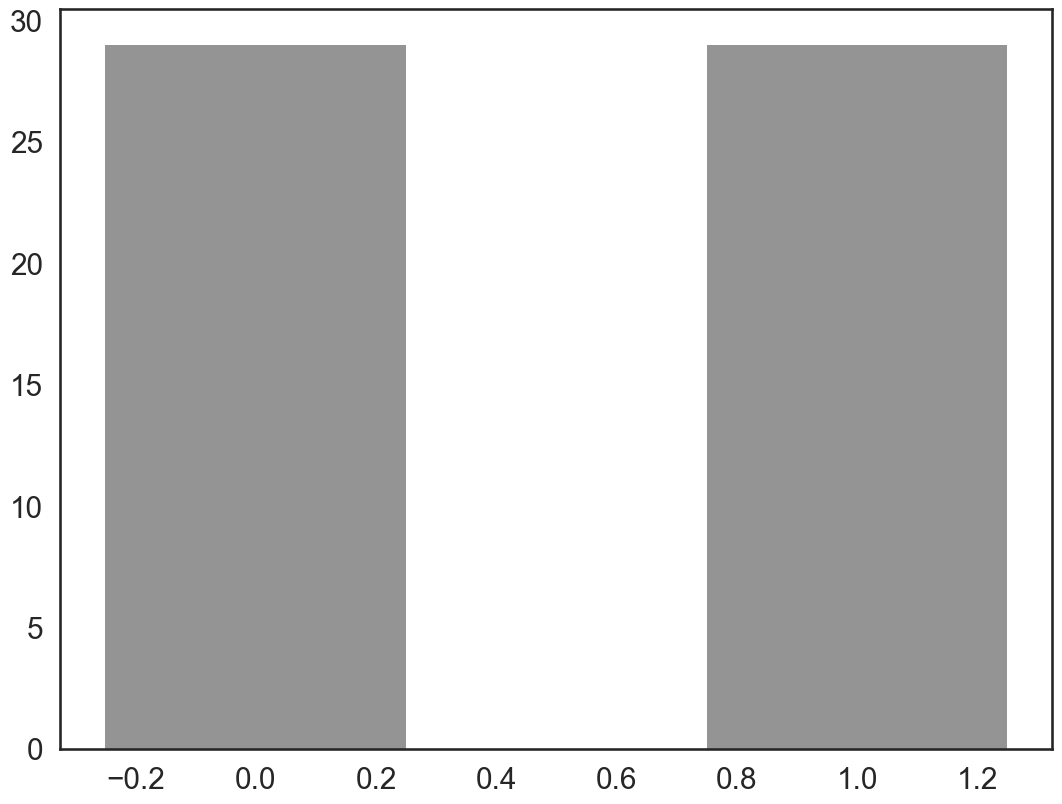

In [35]:
sns.set_theme(context="talk", style="white")

hourly_generation = pd.read_csv("eoles/outputs/20231210/1211004110_biogasS3_capacityN1_demandReindustrialisation_profileReference_policybannopolicy/dataframes/hourly_generation_2050.csv", index_col=0)

climate = 2006

date_start, date_end = datetime.datetime(2006, 2, 7, 0, 0), datetime.datetime(2006, 2, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [2]:
date_start, date_end = datetime.datetime(2006, 6, 7, 0, 0), datetime.datetime(2006, 6, 14, 0, 0)
plot_typical_week(hourly_generation, date_start, date_end, climate, save_path=None, methane=False, hydrogen=True)

In [29]:
hourly_generation.loc[(hourly_generation.hydrogen_in > 0) & (hourly_generation.hydrogen > 0)]

In [30]:
hourly_generation.hydrogen_charge.plot()

count    8760.000000
mean        4.584872
std         2.991499
min         0.000000
25%         4.212162
50%         4.566210
75%         6.055786
max         8.953740
Name: electrolysis, dtype: float64

In [31]:
hourly_generation.hydrogen.iloc[0:1000].plot()

In [34]:
begin, end = 4000, 4050
hourly_generation.hydrogen_in.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.hydrogen.iloc[begin:end].plot(label='hydrogen_in')
hourly_generation.electrolysis.iloc[begin:end].plot(c='black', label='electrolysis')
hourly_generation.H2_demand.iloc[begin:end].plot(c='red')

0       28.181125
1       29.091650
2       29.437800
3       29.430275
4       29.106700
          ...    
8755    24.034850
8756    24.080000
8757    23.929500
8758    23.666125
8759    23.417800
Name: offshore_f, Length: 8760, dtype: float64

In [6]:
hourly_generation.hydrogen_in.describe()